## **Energy Efficency Dataset**

#### Resource: https://archive.ics.uci.edu/dataset/242/energy+efficiency

#### This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.

#### Additional Information

#### We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

#### **Variables Table**

| Variable Name | Role   | Type       | Description                | Units | Missing Values |
|---------------|--------|-----------|---------------------------|-------|----------------|
| X1            | Feature | Continuous | Relative Compactness      |       | no             |
| X2            | Feature | Continuous | Surface Area              |       | no             |
| X3            | Feature | Continuous | Wall Area                 |       | no             |
| X4            | Feature | Continuous | Roof Area                 |       | no             |
| X5            | Feature | Continuous | Overall Height            |       | no             |
| X6            | Feature | Integer    | Orientation               |       | no             |
| X7            | Feature | Continuous | Glazing Area              |       | no             |
| X8            | Feature | Integer    | Glazing Area Distribution |       | no             |
| Y1            | Target  | Continuous | Heating Load              |       | no             |
| Y2            | Target  | Continuous | Cooling Load              |       | no             |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel(r'../data/raw/ENB2012_data.xlsx')
display(df)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


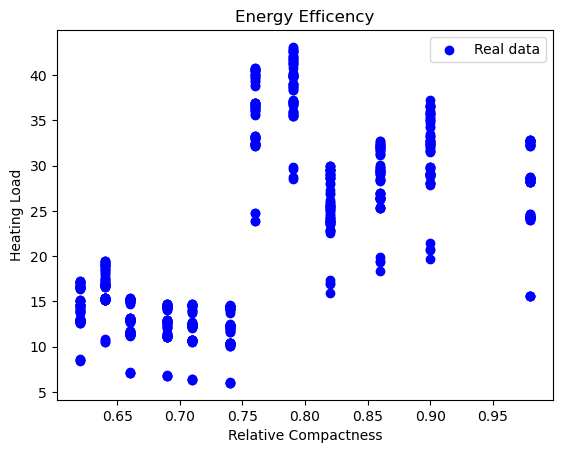

In [3]:
# Select predict variables X and target y:
X = df[["X1"]] # Relative Compactness
y = df["Y1"] # Heating Load

# Divide the dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

plt.scatter(X, y, color='blue', label="Real data")
plt.title("Energy Efficency")
plt.xlabel("Relative Compactness")
plt.ylabel("Heating Load")
plt.legend()
plt.show()

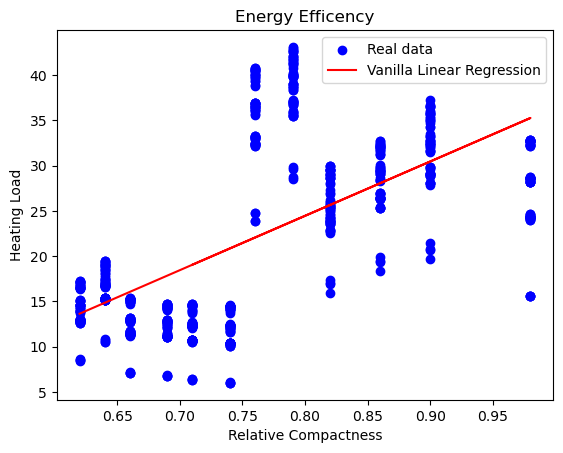

R²: 0.35025615992294


In [4]:
# Vanilla Regression:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) # Trainning linear regressor

y_pred_vanillaReg = lin_reg.predict(X_test) # Predict test data

plt.scatter(X, y, color='blue', label="Real data")
plt.plot(X_test, y_pred_vanillaReg, color="red", label="Vanilla Linear Regression")
plt.title("Energy Efficency")
plt.xlabel("Relative Compactness")
plt.ylabel("Heating Load")
plt.legend()
plt.show()

print(f"R²: {r2_score(y_test, y_pred_vanillaReg)}")

<p align="center">Lasso Regression:</p>

$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(y_{i} - \hat{y}_{i})^2 + \lambda \sum_{j=1}^{n}|\theta_j|

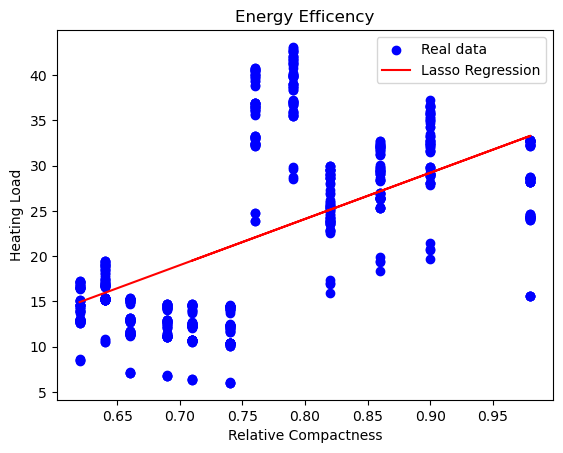

R²: 0.3476245076488339


In [5]:
# Lasso Regression:
# Trainning Lasso model:
lasso_reg = Lasso(alpha=0.1) # alpha = regulariztion strength
lasso_reg.fit(X_train, y_train) # Trainning model

# Predictions:
y_pred_lasso = lasso_reg.predict(X_test)

plt.scatter(X, y, color='blue', label="Real data")
plt.plot(X_test, y_pred_lasso, color="red", label="Lasso Regression")
plt.title("Energy Efficency")
plt.xlabel("Relative Compactness")
plt.ylabel("Heating Load")
plt.legend()
plt.show()

print(f"R²: {r2_score(y_test, y_pred_lasso)}")

<p align="center">Ridge Regression:</p>

$$
J(\theta) = \frac{1}{2n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \theta^{2}_j
$$

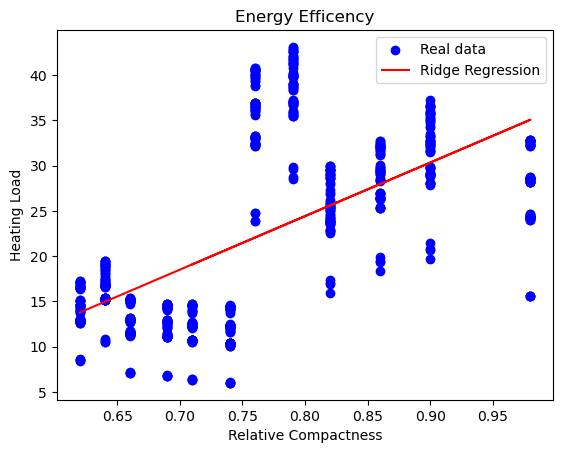

R²: 0.3507839079809584


In [6]:
# Ridge Regression:
# Trainning Ridge Model:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

plt.scatter(X, y, color='blue', label="Real data")
plt.plot(X_test, y_pred_ridge, color="red", label="Ridge Regression")
plt.title("Energy Efficency")
plt.xlabel("Relative Compactness")
plt.ylabel("Heating Load")
plt.legend()
plt.show()

print(f"R²: {r2_score(y_test, y_pred_ridge)}")

<p align="center">Elastic Net Regression:</p>

$$
J(\theta) = \frac{1}{2n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda\left[\rho \sum_{j=1}^{p}|\theta_j|+(1-\rho)\sum_{j=1}^{p}\theta_j^2\right]
$$

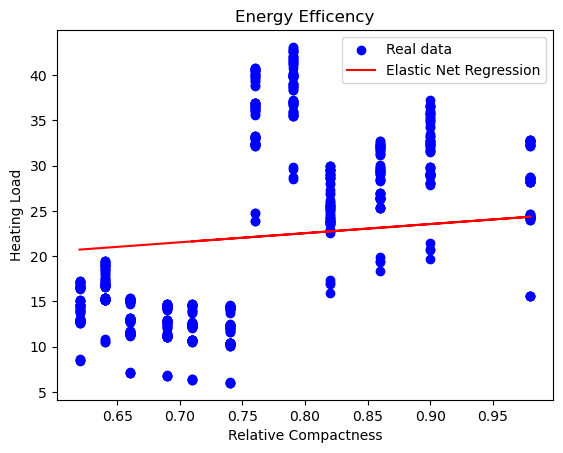

R²: 0.10986853960305776


In [7]:
# Elastic Net:
#Training the model:
elasticNet = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42) # 50% Lasso, 50% Ridge
elasticNet.fit(X_train, y_train)
y_pred_elasticNet = elasticNet.predict(X_test)

plt.scatter(X, y, color='blue', label="Real data")
plt.plot(X_test, y_pred_elasticNet, color="red", label="Elastic Net Regression")
plt.title("Energy Efficency")
plt.xlabel("Relative Compactness")
plt.ylabel("Heating Load")
plt.legend()
plt.show()

print(f"R²: {r2_score(y_test, y_pred_elasticNet)}")

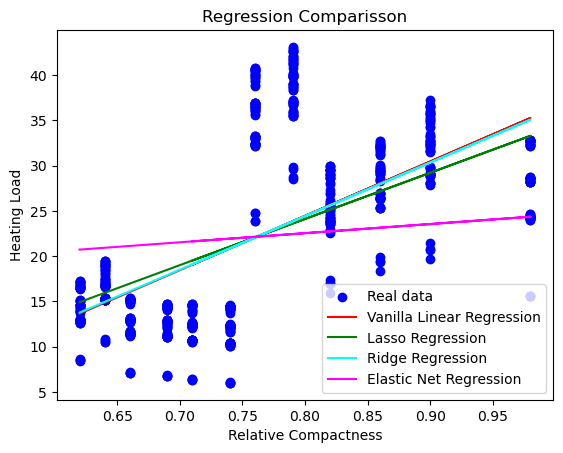

In [8]:
plt.scatter(X, y, color='blue', label="Real data")
plt.plot(X_test, y_pred_vanillaReg, color="red", label="Vanilla Linear Regression")
plt.plot(X_test, y_pred_lasso, color="green", label="Lasso Regression")
plt.plot(X_test, y_pred_ridge, color="cyan", label="Ridge Regression")
plt.plot(X_test, y_pred_elasticNet, color="magenta", label="Elastic Net Regression")
plt.title("Regression Comparisson")
plt.xlabel("Relative Compactness")
plt.ylabel("Heating Load")
plt.legend()
plt.show()

#### La **Normal Equation** permite encontrar la regresión lineal de forma directa:

$$
\theta = (X^T X)^{-1} X^T y
$$

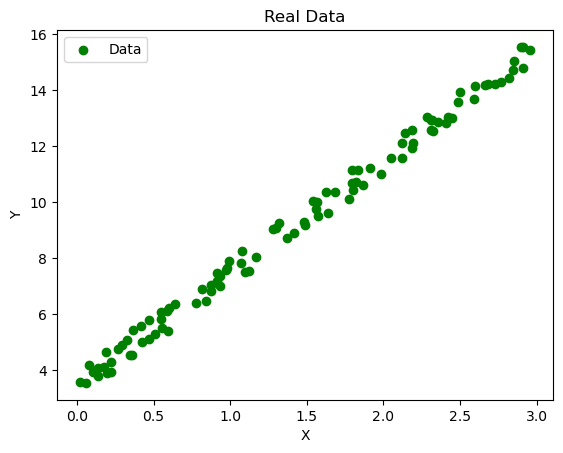

In [9]:
# Generate data:
np.random.seed(42) # Reproducibility of random values

X = 3 * np.random.rand(100, 1) # Generate column vector with random values from 0 to 3
y = 4 * X + 3 + np.random.rand(100, 1) # Generate function y = 4x + 3 + noise

plt.scatter(X, y, color='green', label="Data")
plt.title("Real Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

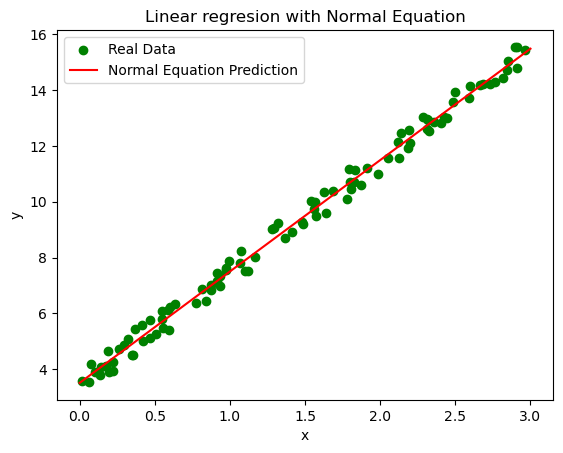

In [10]:
# Create Design Matrix:
X_b = np.c_[np.ones((100, 1)), X] # Concatenate intercept and X values: [[1, x1], [1, x2], ... [1, xn]]

# Get the best parameters:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # theta_best = [b, w] parameters

# Generate test data:
X_test_4normalEq = np.linspace(0, 3, 100) # Linear space to test: 100 values from 0 to 3
X_test_4normalEq_b = np.c_[np.ones((100, 1)), X_test_4normalEq] # Design matrix for test data

y_pred_normalEq = X_test_4normalEq_b.dot(theta_best) # Prediction for test data with normal Equation parameters

# Plot the results:
plt.scatter(X , y, color='green', label='Real Data')
plt.plot(X_test_4normalEq, y_pred_normalEq, color='red', label="Normal Equation Prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear regresion with Normal Equation")
plt.legend()
plt.show()